In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('spam2.csv' ,encoding=("ISO-8859-1"))

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2738,ham,I sent you the prices and do you mean the &lt...,NaN,NaN,NaN
834,ham,Surely result will offer:),NaN,NaN,NaN
1690,spam,Sunshine Quiz Wkly Q! Win a top Sony DVD playe...,NaN,NaN,NaN
5487,spam,2p per min to call Germany 08448350055 from yo...,NaN,NaN,NaN
3836,ham,Early bird! Any purchases yet?,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

## 1. Data Cleaning 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# dropping the last 3 columns
df.drop(columns=["Unnamed: 2","Unnamed: 3","Unnamed: 4"],inplace=True)

In [7]:
df.sample(5)

,v1,v2
2876,ham,twenty past five he said will this train have ...
2821,spam,ROMCAPspam Everyone around should be respondin...
1871,ham,Dont know supports ass and srt i thnk. I think...
824,ham,Have a good evening! Ttyl
2173,ham,"Hiya, had a good day? Have you spoken to since..."


In [8]:
# renaming the columns
df.rename(columns={'v1':'target','v2':'data'},inplace=True)
df.sample(5)

,target,data
317,ham,"Not really dude, have no friends i'm afraid :("
796,spam,"Orange customer, you may now claim your FREE C..."
5237,spam,Someonone you know is trying to contact you vi...
5042,ham,O ic lol. Should play 9 doors sometime yo
3679,ham,I cant pick the phone right now. Pls send a me...


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [10]:
df['target']=encoder.fit_transform(df['target'])

In [11]:
df.head()

,target,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
# missing values
df.isnull().sum()

target    0
data      0
dtype: int64

In [13]:
# duplicate value
df.duplicated().sum()

403

In [14]:
# removing the duplicate values
df=df.drop_duplicates(keep='first')

In [15]:
df.duplicated().sum()

0

In [16]:
df.shape

(5169, 2)

## 2. Performing EDA(Exploratory Data Analysis)

In [17]:
df.head()

,target,data
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

In [19]:
import matplotlib.pyplot as plt

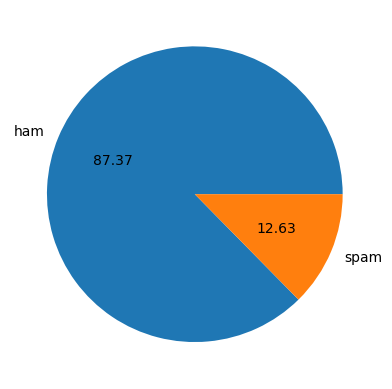

In [20]:
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [21]:
# Data is imbalanced

In [22]:
import nltk

In [23]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [24]:
df['num_characters']=df['data'].apply(len)

In [25]:
df.head()

,target,data,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [26]:
# breaking on the basis of number of words 
df['num_words']=df['data'].apply(lambda x:len(nltk.word_tokenize(x)))

In [27]:
df.head()

,target,data,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [28]:
# number of sentences
df['num_sentences']=df['data'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [29]:
df.head()

,target,data,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [30]:
# for entire data
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [31]:
# for ham messages
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [32]:
# for spam messages
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


In [33]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

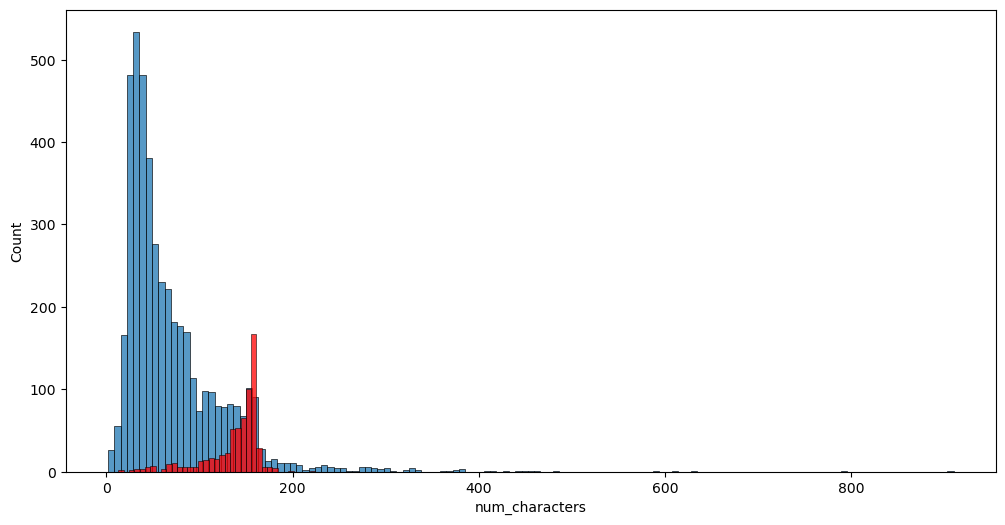

In [34]:
plt.figure(figsize=[12,6])
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

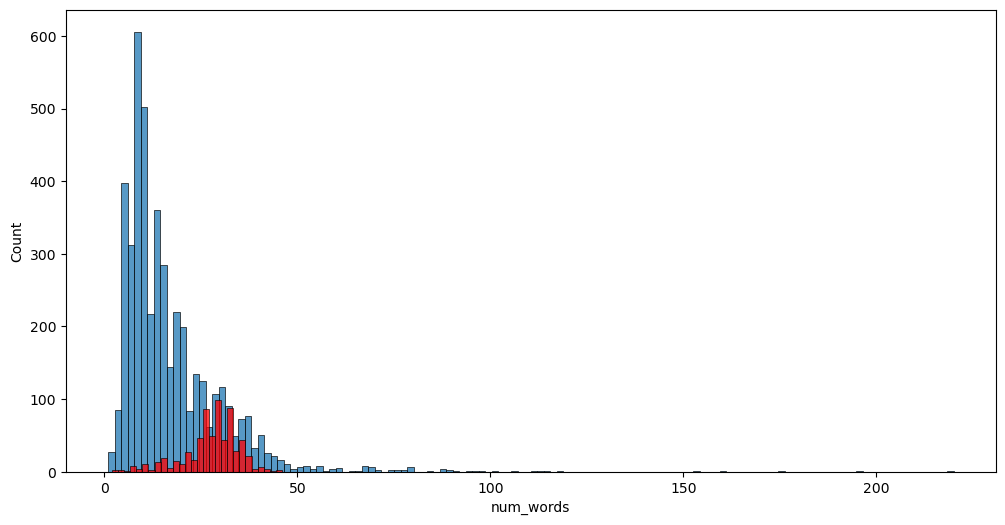

In [35]:
plt.figure(figsize=[12,6])
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

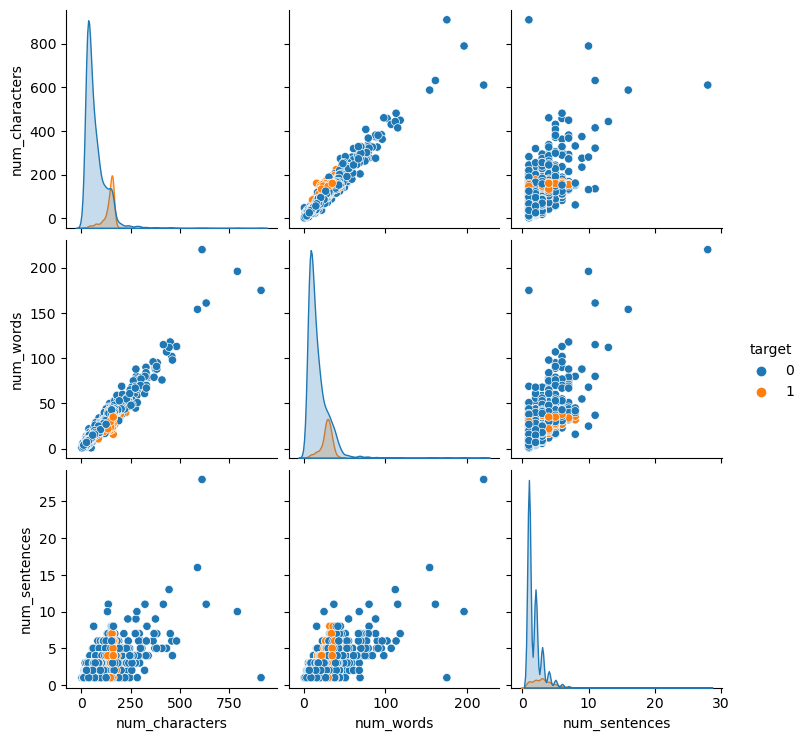

In [36]:
sns.pairplot(df,hue='target')

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_5276\4277794465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

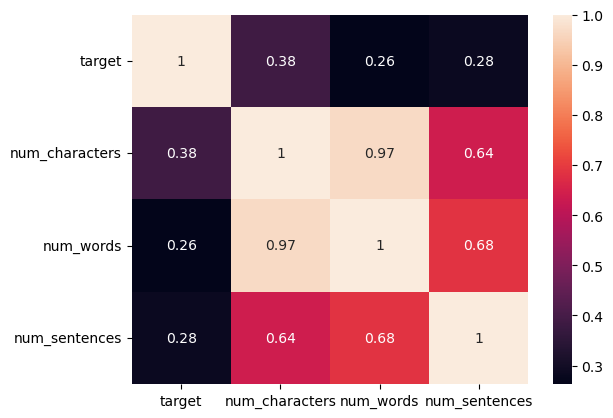

In [37]:
sns.heatmap(df.corr(),annot=True)

## 3. Data Pre - Processing 

In [38]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
def transform_text(data):
    data=data.lower()#converting to lower case
    data=nltk.word_tokenize(data)#performing tokenization
    y=[]
    for i in data: #removing special characters
        if i.isalnum:
            y.append(i)
    
    data=y[:] #cloning 
    y.clear()
    
    for i in data:
        if i not in stopwords.words('english') and i not in string.punctuation:#removing stopwords and punctuation
            y.append(i)
            
    data=y[:] #cloning 
    y.clear()
    
    for i in data: #stemming
        y.append(ps.stem(i))
    
    return " ".join(y)

In [39]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [40]:
df['transformed_text']=df['data'].apply(transform_text)

In [41]:
df.head()

,target,data,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


In [42]:
pip install wordcloud

In [43]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [44]:
spam_wc=wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

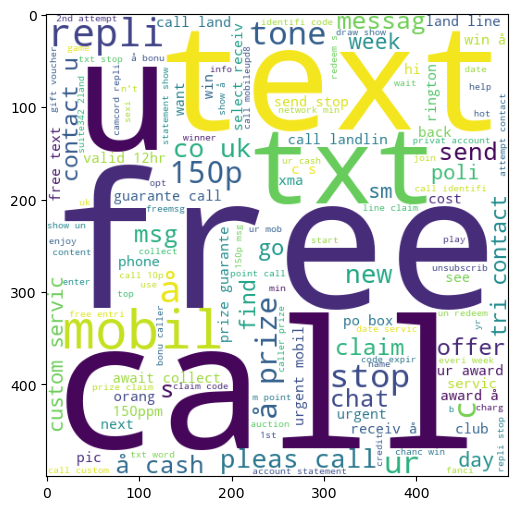

In [45]:
plt.figure(figsize=[15,6])
plt.imshow(spam_wc)

In [46]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

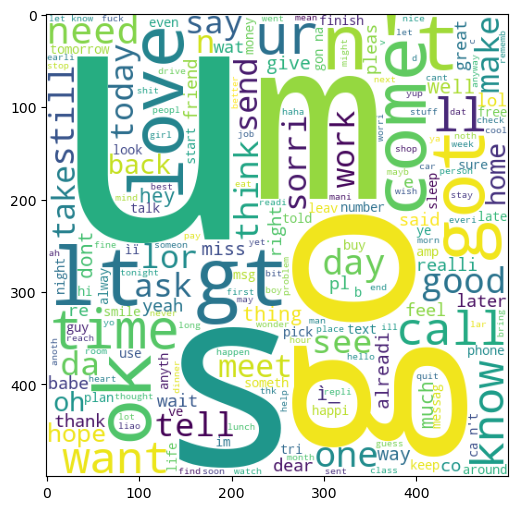

In [47]:
plt.figure(figsize=[15,6])
plt.imshow(ham_wc)

In [48]:
spam_corpus=[]
for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [49]:
len(spam_corpus)

11083

In [50]:
ham_corpus=[]
for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [51]:
len(ham_corpus)

39897

In [53]:
df.head()

,target,data,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi .. avail bugi n great wo...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar ... joke wif u oni ...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor ... u c alreadi say ...
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah n't think goe usf live around though


## 4. Model Building

In [92]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [93]:
X=tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
X.shape

(5169, 3000)

In [95]:
Y=df['target'].values

In [96]:
Y

array([0, 0, 1, ..., 0, 0, 0])

In [97]:
# splitting traiined and tested
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,Y,test_size=0.2,random_state=2)

In [98]:
# applying naive bayes algorithm
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [99]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [100]:
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.879110251450677
[[790 106]
 [ 19 119]]
0.5288888888888889


In [101]:
mnb.fit(x_train,y_train)
y_pred2=mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9748549323017408
[[896   0]
 [ 26 112]]
1.0


In [103]:
bnb.fit(x_train,y_train)
y_pred3=bnb.predict(x_test)
print('Accuracy:',accuracy_score(y_test,y_pred3))
print('Precision:',precision_score(y_test,y_pred3))

Accuracy: 0.9864603481624759
Precision: 1.0


## WE WILL SELECT BERNAULLI NAIVE BAYES ALGORITHM AS IT HAS HIGHEST PRECISION SCORE ALONG WITH HIGHEST ACCURACY